# Milestone Project 2: SkimLit

## Confirm access to GPU

In [ ]:
!nvidia-smi -L

/bin/bash: nvidia-smi: command not found


## Data loading and preprocessing

### Get Data

In [ ]:
## https://github.com/Franck-Dernoncourt/pubmed-rct.git

!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Unpacking objects: 100% (33/33), 177.08 MiB | 4.49 MiB/s, done.
Updating files: 100% (13/13), done.


In [ ]:
!ls pubmed-rct

PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [ ]:
# check what files are in 20k, we will start small and scale later
!ls /content/pubmed-rct/PubMed_20k_RCT
!ls /content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt
dev.txt  test.txt  train.txt


In [ ]:
# Start experimenting with PubMed_20k_RCT_numbers_replaced_with_at_sign (number replace with '@')

data_dir = '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign'

In [ ]:
import os
files = [os.path.join(data_dir, file) for file in os.listdir(data_dir)]
files

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt']

### Become one with data
- Visualize, visualize, visualize

In [ ]:
def get_lines(filename):
    with open(filename, 'r') as file:
        lines_list = file.readlines()
    return lines_list


In [ ]:
train_lines = get_lines(files[0])

In [ ]:
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [ ]:
len(train_lines)

210040

lets think how you want the data to look or best represented



```
[{line_number:0, 'target':'BACKGROUND', 'text':'Emotional eating.....', 'total_lines':11}, {'line_number'...},{...}....{...}]
```



In [ ]:
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [ ]:
def preprocess_text_with_line_number(filename):

    input_lines = get_lines(filename)
    abstract_samples = []
    abstract_lines = " "


    #loop through lines in text
    for i, line in enumerate(input_lines):
        if line.startswith("###"):
            abstract_id = line
            abstract_lines = " "

        elif line.isspace():
            abstract_line_split = abstract_lines.splitlines()

            for line_no, line in enumerate(abstract_line_split):
                line_data = {}
                text_split = line.split('\t')
                line_data['line_no'] = line_no
                line_data['target'] = text_split[0].strip()
                line_data['text'] = text_split[1].lower()
                line_data['total_lines'] = len(abstract_line_split)
                abstract_samples.append(line_data)

        else:
            abstract_lines+=line

    return abstract_samples

In [ ]:
files

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt']

In [ ]:
%%time
train_samples = preprocess_text_with_line_number(files[0])
test_samples = preprocess_text_with_line_number(files[1])
val_samples = preprocess_text_with_line_number(files[2])
len(train_samples), len(test_samples), len(val_samples)

CPU times: user 778 ms, sys: 140 ms, total: 918 ms
Wall time: 1.8 s


(180040, 30135, 30212)

In [ ]:
# Check the first abstract
train_samples[:14]

[{'line_no': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'total_lines': 12},
 {'line_no': 1,
  'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'total_lines': 12},
 {'line_no': 2,
  'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'total_lines': 12},
 {'line_no': 3,
  'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'total_lines': 12},
 {'line_no': 4,
  'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

In [ ]:
import pandas as pd
# since we parsed our data as dictionary,visualizing with pandas would be easy
train_df = pd.DataFrame(train_samples)
test_df =pd.DataFrame(test_samples)
val_df = pd.DataFrame(val_samples)


In [ ]:
train_df.iloc[:20]

,line_no,target,text,total_lines
0,0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,12
1,1,METHODS,a total of @ patients with primary knee oa wer...,12
2,2,METHODS,outcome measures included pain reduction and i...,12
3,3,METHODS,pain was assessed using the visual analog pain...,12
4,4,METHODS,secondary outcome measures included the wester...,12
5,5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",12
6,6,RESULTS,there was a clinically relevant reduction in t...,12
7,7,RESULTS,the mean difference between treatment arms ( @...,12
8,8,RESULTS,"further , there was a clinically relevant redu...",12
9,9,RESULTS,these differences remained significant at @ we...,12


In [ ]:
# Check the distribution of the labels
train_df['target'].value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

<Axes: ylabel='Frequency'>

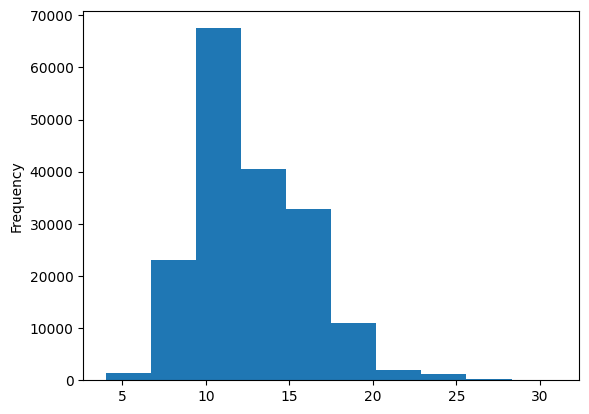

In [ ]:
# length of different lines
train_df.total_lines.plot(kind='hist')

In [ ]:
## get the list of sentences

train_sentences = train_df.text.tolist()
val_sentences = val_df.text.tolist()
test_sentences = test_df.text.tolist()

len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

In [ ]:
train_sentences[:5]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .']

### Encode target labels

In [ ]:
import numpy as np
len(np.unique(train_df.target))

5

In [ ]:
train_df.target.shape

(180040,)

In [ ]:
train_df.target.to_numpy().reshape(-1, 1).shape

(180040, 1)

In [ ]:
# one hot encoder
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=True) ## generates sparze matrix, Note tensorflow is incompatible with sparse matrix
train_labels_ohe_sparse = one_hot_encoder.fit_transform(train_df.target.to_numpy().reshape(-1, 1))

train_labels_ohe_sparse #Note tensorflow is incompatible with sparse matrix

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


<180040x5 sparse matrix of type '<class 'numpy.float64'>'
	with 180040 stored elements in Compressed Sparse Row format>

In [ ]:
import tensorflow as tf
tf.constant(train_labels_ohe_sparse) # incompatible

ValueError: ignored

In [ ]:
# one hot encoder
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False) ## generates sparze matrix, Note tensorflow is incompatible with sparse matrix
train_labels_ohe = one_hot_encoder.fit_transform(train_df.target.to_numpy().reshape(-1, 1))
val_labels_ohe = one_hot_encoder.transform(val_df.target.to_numpy().reshape(-1, 1))
test_labels_ohe = one_hot_encoder.transform(test_df.target.to_numpy().reshape(-1, 1))

train_labels_ohe

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
tf.constant(train_labels_ohe)

<tf.Tensor: shape=(180040, 5), dtype=float64, numpy=
array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])>

### Label encoded target

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df.target.to_numpy())
val_labels_encoded = label_encoder.transform(val_df.target.to_numpy())
test_labels_encoded = label_encoder.transform(test_df.target.to_numpy())

In [ ]:
train_labels_encoded[:10]

array([3, 2, 2, 2, 2, 2, 4, 4, 4, 4])

In [ ]:
np.unique(train_labels_encoded)

array([0, 1, 2, 3, 4])

In [ ]:
# Get clas anmes and number of classes from LabelEncoder instance
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

## Modelling Experiment

Baseline - Naive Bayes

### Baseline Model 0: NaiveBayes with tfidf vectorizer

In [ ]:
train_sentences[:5]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
vectorizer = TfidfVectorizer()
train_sentences_vectorized = vectorizer.fit_transform(train_sentences)
test_sentences_vectorized =vectorizer.transform(test_sentences)
val_sentences_vectorized =vectorizer.transform(val_sentences)

In [ ]:
train_sentences_vectorized[:5]

<5x45871 sparse matrix of type '<class 'numpy.float64'>'
	with 99 stored elements in Compressed Sparse Row format>

In [ ]:
clf = MultinomialNB()
clf.fit(train_sentences_vectorized, train_labels_encoded)


MultinomialNB()

In [ ]:
model_0_results = clf.score(test_sentences_vectorized, test_labels_encoded)

In [ ]:
## Building model using pipeline, very import skill
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
            ('tf-idf', TfidfVectorizer()),
            ('clf', MultinomialNB())
])


# fit the model
model_0.fit(X=train_sentences,
            y=train_labels_encoded)


Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
model_0_results = model_0.score(val_sentences, val_labels_encoded)

In [ ]:
model_0_results

0.7218323844829869

In [ ]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [ ]:
## Download helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py


--2023-07-05 08:47:00--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-07-05 08:47:00 (93.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import calculate_results

In [ ]:
baseline_results = calculate_results(y_true=val_labels_encoded, y_pred=baseline_preds)
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

## Dataset preparation for tensorflow build

In [ ]:
# hyperparameters
vocab_size = 68000 #from paper table2
sent_lens = [len(s.split()) for s in train_sentences]

# avg length of sentence
avg_length = np.mean(sent_lens)

#max_seq_length
max_seq_length = max(sent_lens)
avg_length, max_seq_length

(26.338269273494777, 296)

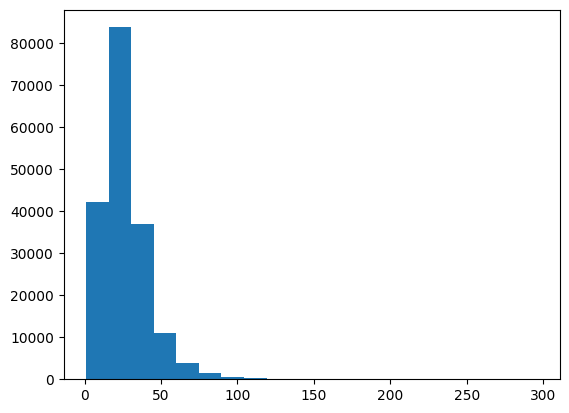

In [ ]:
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins=20)
plt.show()

In [ ]:
# 95 percentiles
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

55

In [ ]:
# build text vectorizer and embedding layer
from tensorflow.keras.layers import TextVectorization, Embedding


text_vectorizer = TextVectorization(max_tokens=vocab_size, output_sequence_length=output_seq_len)
text_vectorizer.adapt(train_sentences)


In [ ]:
# Test the vectoizer
import random
target_sent = random.choice(train_sentences)
print(f"Target Sentence:\n{target_sent}\n")
print(f"Length of the sentence: {len(target_sent.split())}\n")
print(f"Vectorized form:\n{text_vectorizer([target_sent])}")


Target Sentence:
in summary , @ weeks of nmes promotes reduction of the perceived sensation of dyspnea during exercise in patients with copd .

Length of the sentence: 22

Vectorized form:
[[   5 2483   53    4 3597 5053  169    4    2  813 3188    4 2885   52
   177    5   12    7  762    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]]


In [ ]:
# How many word in training vocab
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of word in Vocab: {len(rct_20k_text_vocab)}")
print(f"Most common words: {rct_20k_text_vocab[:5]}")
print(f"Least common words: {rct_20k_text_vocab[-5:]}")

Number of word in Vocab: 64841
Most common words: ['', '[UNK]', 'the', 'and', 'of']
Least common words: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [ ]:
# Get the config of our text vectorizer
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None,),
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}

**Create custom embedding**
- to capture the relationship between tokens
- text vectorization just converts words to token, doesn't give any notion of relationship between token

In [ ]:
# define the Embedding layer
embedding = Embedding(input_dim=len(rct_20k_text_vocab),
                      output_dim=128,
                      mask_zero=True,
                      input_length=output_seq_len,
                      name='embedding_layer')

In [ ]:
# Test embedding
target_sent = random.choice(train_sentences)
print(f"Target sentence:\n {target_sent}\n")
vectorized_sent = text_vectorizer([target_sent])
print(f"Shape of vectorized sentence: {vectorized_sent.shape}")
print(f"Vectorized text:\n {vectorized_sent}\n")
embedded_text = embedding(vectorized_sent)
print(f"Shape of embedded sentence: {embedded_text.shape}")
print(f"Embedded text:\n {embedded_text}\n")


Target sentence:
 the aim of the present randomized , double-blind , placebo-controlled clinical trial was to assess the efficacy and tolerability of @ % indomethacin ( indom ) eye drops in adult patients suffering from macular edema ( me ) related to different etiology uveitis .

Shape of vectorized sentence: (1, 55)
Vectorized text:
 [[    2   267     4     2   369    29   236   329    47    32    10     6
    216     2    79     3   833     4  7855 26143   672  2886     5   602
     12  2586    27  1541  1729  7338   328     6   197  4713 15287     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]

Shape of embedded sentence: (1, 55, 128)
Embedded text:
 [[[-0.04775466  0.00638099  0.01147725 ... -0.01084697 -0.01818622
   -0.03252927]
  [-0.03230723  0.00640974 -0.04851732 ...  0.03992367  0.04256766
   -0.00191176]
  [ 0.02613196 -0.03482284  0.04850044 ...  0.0056017   0.02893968
   -0.04425035]
  ...
  [-0.0

In [ ]:
import tensorflow as tf

In [ ]:
## Create datasets using tf.data api (making sure data loads as fast as possible)
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_ohe))
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_ohe))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_ohe))

In [ ]:
train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [ ]:
# Take the tf dataset, prefetch and batch them
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # automatically prefetch as many datasets as you can
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

## Model 1: Conv1D with token embeddings

### Model building and compiling

In [ ]:
# We will build model using functional API

# inputs layer
inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)

# vectorizer layer
x = text_vectorizer(inputs)

# embedding layer
x = embedding(x)
print(x.shape)

# Conv1d layer
x = tf.keras.layers.Conv1D(filters=32, kernel_size=5, activation='relu')(x)
print(x.shape)

# global max pool layer
x = tf.keras.layers.GlobalMaxPooling1D(name='global_max_pool')(x)
print(x.shape)

# outputs layers
outputs = tf.keras.layers.Dense(5, activation='softmax')(x)
print(outputs.shape)

# Create model
model_1 = tf.keras.Model(inputs, outputs, name='model_1_conv1')


(None, 55, 128)
(None, 51, 32)
(None, 32)
(None, 5)


In [ ]:
model_1.summary()

Model: "model_1_conv1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 embedding_layer (Embedding)  (None, 55, 128)          8299648   
                                                                 
 conv1d (Conv1D)             (None, 51, 32)            20512     
                                                                 
 global_max_pool (GlobalMaxP  (None, 32)               0         
 ooling1D)                                                       
                                                                 
 dense (Dense)               (None, 5)               

In [ ]:
# compile the  model
model_1.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [ ]:
from helper_functions import create_tensorboard_callback

In [ ]:
# define callbacks

SAVE_DIR = 'model_logs'
tensorboard_callback = create_tensorboard_callback(dir_name=SAVE_DIR,
                                                   experiment_name='skim_lit_conv1d')

Saving TensorBoard log files to: model_logs/skim_lit_conv1d/20230705-084722


### Model fitting and evaluation

In [ ]:
# fit the model
# we will only use 10% of train dataset,
# since we are at intial experimentation stage where we should ideally be testing different model in very small time

history_conv1 = model_1.fit(train_dataset,
                            steps_per_epoch=int(0.1 * len(train_dataset)),
                            epochs=3,
                            validation_data=val_dataset,
                            validation_steps= int(0.1 * len(val_dataset)))
                            #callbacks=[tensorboard_callback])

# as we know first epoch takes time, i fyou are using GPU, it would take some time to copy data from CPU to GPU at first time, later epochs will be faster

Epoch 1/3
562/562 [==============================] - 83s 143ms/step - loss: 0.8881 - accuracy: 0.6597 - val_loss: 0.6195 - val_accuracy: 0.7686
Epoch 2/3
562/562 [==============================] - 67s 119ms/step - loss: 0.5998 - accuracy: 0.7790 - val_loss: 0.5550 - val_accuracy: 0.7892
Epoch 3/3
562/562 [==============================] - 65s 116ms/step - loss: 0.5583 - accuracy: 0.7947 - val_loss: 0.5351 - val_accuracy: 0.7972


In [ ]:
model_1.evaluate(val_dataset)

945/945 [==============================] - 5s 5ms/step - loss: 0.5370 - accuracy: 0.7985


[0.5369555950164795, 0.7985237836837769]

In [ ]:
# make predictions
model_1_pred_probs = model_1.predict(val_dataset) # prediction probabilities
model_1_preds = tf.argmax(model_1_pred_probs, axis=1) # index of the max probability
model_1_preds

945/945 [==============================] - 4s 4ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 1, 1])>

In [ ]:
model_1_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_1_preds)

In [ ]:
model_1_results

{'accuracy': 79.85237653912353,
 'precision': 0.7974274826266919,
 'recall': 0.7985237653912353,
 'f1': 0.7966590987701896}

## Model 2: Feature extraction with pretrained token embeddings

Paper originally used Glove emebeddings but we will use here Tensorflow hub universal sentence encoder

### Defining petrained universal sentence encoder layer

In [ ]:
import tensorflow_hub as hub

tf_hub_embeddinglayer =hub.KerasLayer(handle='https://tfhub.dev/google/universal-sentence-encoder/4',
               trainable=False,
               name='universal_sentence_encoder')

In [ ]:
# Test the embedding layer

random_sent = random.choice(train_sentences)
print(f"Random Senetence:\n{random_sent}\n")
use_embedded_sentence = tf_hub_embeddinglayer([random_sent])
print(f"Sentence after embedding:\n{use_embedded_sentence[0][:30]}\n")
print(f"Length of the emebedded sentence:{len(use_embedded_sentence[0])}")

Random Senetence:
moreover , tirofiban group had a significantly lower @-day all-cause mortality ( secondary end point ; or @ , @ % ci @-@ @ ) , compared with patients who were not administered tirofiban .

Sentence after embedding:
[-0.05399739 -0.01261903 -0.06846177 -0.04384349 -0.03243421  0.00766994
  0.01547588 -0.03893176  0.01267669  0.05471399  0.09010804 -0.0045761
 -0.00902583  0.06942483  0.05546946 -0.03773649 -0.09190311 -0.05654491
  0.01091603 -0.02116268  0.07714324  0.0580567  -0.04443394 -0.01029679
  0.04848974  0.0254065  -0.01723488  0.01764961 -0.00713192 -0.00317086]

Length of the emebedded sentence:512


### Model building and compiling

In [ ]:
# Build feature extraction model here using pretrained embedding USE

inputs = tf.keras.layers.Input(shape=[], dtype=tf.string)
pretrained_embeddings = tf_hub_embeddinglayer(inputs)
print(pretrained_embeddings.shape)
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_embeddings)
outputs = tf.keras.layers.Dense(5, activation='softmax')(x)

model_2 = tf.keras.Model(inputs, outputs, name='model_2_use')

(None, 512)


In [ ]:
model_2.summary()


Model: "model_2_use"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 universal_sentence_encoder   (None, 512)              256797824 
 (KerasLayer)                                                    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256,864,133
Trainable params: 66,309
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
model_2.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

### Model fitting and evaluation

In [ ]:
# fit the model

history_use = model_2.fit(train_dataset,
                         epochs=3,
                         steps_per_epoch=int(0.1*len(train_dataset)),
                         validation_data=val_dataset,
                         validation_steps=int(0.1*len(val_dataset)))

Epoch 1/3
562/562 [==============================] - 12s 15ms/step - loss: 0.9157 - accuracy: 0.6534 - val_loss: 0.7959 - val_accuracy: 0.6885
Epoch 2/3
562/562 [==============================] - 9s 16ms/step - loss: 0.7687 - accuracy: 0.7008 - val_loss: 0.7554 - val_accuracy: 0.7048
Epoch 3/3
562/562 [==============================] - 8s 15ms/step - loss: 0.7538 - accuracy: 0.7112 - val_loss: 0.7405 - val_accuracy: 0.7121


Training was faster, as we had very few trainable parameters

In [ ]:
model_2.evaluate(val_dataset)

945/945 [==============================] - 11s 12ms/step - loss: 0.7433 - accuracy: 0.7137


[0.7432956099510193, 0.7137230038642883]

In [ ]:
model_2_preds_probs = model_2.predict(val_sentences)
model_2_preds = tf.argmax(model_2_preds_probs, axis=1)
model_2_preds

945/945 [==============================] - 12s 12ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 2])>

In [ ]:
model_2_results = calculate_results(val_labels_encoded, model_2_preds)
model_2_results

{'accuracy': 71.37230239639878,
 'precision': 0.7143148174868424,
 'recall': 0.7137230239639878,
 'f1': 0.7108278783810322}

In [ ]:
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

## Model 3: Conv1D with character embedding

Create charcter level tokenizer

In [ ]:
train_sentences[:5]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .']

In [ ]:
def split_chars(text):
  return ' '.join(list(text))

In [ ]:
split_chars(random_sent)

'm o r e o v e r   ,   t i r o f i b a n   g r o u p   h a d   a   s i g n i f i c a n t l y   l o w e r   @ - d a y   a l l - c a u s e   m o r t a l i t y   (   s e c o n d a r y   e n d   p o i n t   ;   o r   @   ,   @   %   c i   @ - @   @   )   ,   c o m p a r e d   w i t h   p a t i e n t s   w h o   w e r e   n o t   a d m i n i s t e r e d   t i r o f i b a n   .'

In [ ]:
train_chars = [split_chars(s) for s in train_sentences]
val_chars = [split_chars(s) for s in val_sentences]
test_chars = [split_chars(s) for s in test_sentences]

In [ ]:
train_chars[:2]

['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .',
 'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .']

In [ ]:
# find out the max length and avg length of sentence
char_lens = [len(s) for s in train_sentences]
max_char_lens = max(char_lens)
avg_char_len = np.mean(char_lens)
print(f"Max length: {max_char_lens}")
print(f"Avg length: {avg_char_len}")

Max length: 1386
Avg length: 149.3662574983337


In [ ]:
len(train_sentences[0])

281

In [ ]:
len(train_sentences[0].split())

49

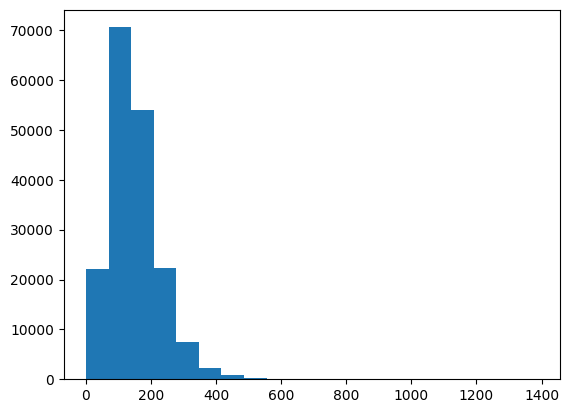

In [ ]:
# Check the distribution of our sequences at character-level
import matplotlib.pyplot as plt
plt.hist(char_lens, bins=20)
plt.show()

In [ ]:
# find the 95the percentile
output_max_char_len = int(np.percentile(char_lens, 95))
output_max_char_len

290

In [ ]:
random.choice(train_sentences)

'when stratified by baseline viral load of either @,@ or > @,@ copies/ml , @/@ ( @ % ) versus @/@ ( @ % ) rpv/ftc/tdf-treated subjects and @/@ ( @ % ) versus @/@ ( @ % ) efv/ftc/tdf-treated subjects developed resistant isolates , respectively .'

In [ ]:
# Get all keyborad character
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# create char level tokenizer
NUM_CHAR_TOKENS = len(alphabet) + 2
char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS,
                                    output_sequence_length=output_max_char_len,
                                    name='char_vectorizer')

# adapt char vectorizer
char_vectorizer.adapt(train_chars)

char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different characters in vocab: {len(char_vocab)}")
print(f"5 most common character: {char_vocab[:5]}")
print(f"5 least common character: {char_vocab[-5:]}")

Number of different characters in vocab: 28
5 most common character: ['', '[UNK]', 'e', 't', 'i']
5 least common character: ['k', 'x', 'z', 'q', 'j']


In [ ]:
# # create char level tokenizer with standarize atribute as None, which would mean it will include all punctuations
# char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS,
#                                     output_sequence_length=output_max_char_len,
#                                     standardize=None)

# # adapt char vectorizer
# char_vectorizer.adapt(train_chars)

# # get vocabulary
# char_vocab = char_vectorizer.get_vocabulary()
# print(f"Number of different characters in vocab: {len(char_vocab)}")
# print(f"5 most common character: {char_vocab[:5]}")
# print(f"5 least common character: {char_vocab[-5:]}")

In [ ]:
random_train_chars = random.choice(train_chars)
print(f"Random train chars:\n{random_train_chars}\n")
print(f"Length of train chars: {len(random_train_chars)}")
vectorized_chars = char_vectorizer([random_train_chars])
print(f"\nVectorized char:\n {vectorized_chars}\n")
print(f"Length of vectoized chars: {len(vectorized_chars[0])}")

Random train chars:
(   c l i n i c a l t r i a l s . g o v   n u m b e r   ,   n c t @   .   )

Length of train chars: 75

Vectorized char:
 [[11 12  4  6  4 11  5 12  3  8  4  5 12  9 18  7 21  6 16 15 22  2  8  6
  11  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0 

### Create character-level Embedding layer

In [ ]:
char_embed = Embedding(input_dim=len(char_vocab),
                       output_dim=25, ## as per paper
                       mask_zero=True,
                       name='char_embed')

In [ ]:
## Test our embeding layer
print(f"Train char:\n {random_train_chars}\n")
char_embedded = char_embed(char_vectorizer([random_train_chars]))
print(f"Embedded train char (after vectorization):\n{char_embedded}\n")
print(f"Shape of the embedded char: {char_embedded.shape}")

Train char:
 (   c l i n i c a l t r i a l s . g o v   n u m b e r   ,   n c t @   .   )

Embedded train char (after vectorization):
[[[ 0.03479196 -0.00500244 -0.03910791 ... -0.0073671  -0.04295015
    0.00715709]
  [-0.00028683 -0.03666242 -0.00641401 ...  0.04401269  0.01258047
   -0.02731011]
  [ 0.02513893 -0.02022066  0.01070277 ...  0.02685412 -0.04001154
    0.01240755]
  ...
  [ 0.04930247  0.02581016  0.00385452 ... -0.01918099 -0.04110106
   -0.02300632]
  [ 0.04930247  0.02581016  0.00385452 ... -0.01918099 -0.04110106
   -0.02300632]
  [ 0.04930247  0.02581016  0.00385452 ... -0.01918099 -0.04110106
   -0.02300632]]]

Shape of the embedded char: (1, 290, 25)


### Model building and compiling

In [ ]:
# building the model3

inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)

#vectorize
x = char_vectorizer(inputs)

# embed
x = char_embed(x)

# conv1d layer
x = tf.keras.layers.Conv1D(64, 5, activation='relu')(x)

# global max pooling
x = tf.keras.layers.GlobalMaxPool1D(name='global_max_pool')(x)

# output
outputs = tf.keras.layers.Dense(5, activation='softmax')(x)

# create model
model_3 = tf.keras.Model(inputs, outputs, name='model_3_char_conv1D')

In [ ]:
model_3.summary()

Model: "model_3_char_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVector  (None, 290)              0         
 ization)                                                        
                                                                 
 char_embed (Embedding)      (None, 290, 25)           700       
                                                                 
 conv1d_1 (Conv1D)           (None, 286, 64)           8064      
                                                                 
 global_max_pool (GlobalMaxP  (None, 64)               0         
 ooling1D)                                                       
                                                                 
 dense_3 (Dense)             (None, 5)         

In [ ]:
# compile
model_3.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

### Build char level dataset

In [ ]:
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_ohe)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_ohe)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_labels_ohe)).batch(32).prefetch(tf.data.AUTOTUNE)

###Model fitting and evaluation

In [ ]:
history_char_conv1d = model_3.fit(train_char_dataset,
                                  steps_per_epoch=int(0.1 * len(train_dataset)),
                                  epochs=3,
                                  validation_data=val_char_dataset,
                                  validation_steps=int(0.1 * len(val_dataset)))

Epoch 1/3
562/562 [==============================] - 15s 26ms/step - loss: 1.2624 - accuracy: 0.4950 - val_loss: 1.0409 - val_accuracy: 0.5941
Epoch 2/3
562/562 [==============================] - 14s 25ms/step - loss: 0.9981 - accuracy: 0.6005 - val_loss: 0.9309 - val_accuracy: 0.6376
Epoch 3/3
562/562 [==============================] - 14s 26ms/step - loss: 0.9137 - accuracy: 0.6432 - val_loss: 0.8518 - val_accuracy: 0.6769


In [ ]:
model_3.evaluate(val_char_dataset)

945/945 [==============================] - 8s 9ms/step - loss: 0.8709 - accuracy: 0.6641


[0.8709000945091248, 0.6640738844871521]

In [ ]:
model_3_preds_probs = model_3.predict(val_char_dataset)
model_3_preds = tf.argmax(model_3_preds_probs, axis=1)
model_3_preds

945/945 [==============================] - 8s 8ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 1, 3, ..., 4, 2, 1])>

In [ ]:
model_3_results = calculate_results(val_labels_encoded, model_3_preds)
model_3_results

{'accuracy': 66.40738779292997,
 'precision': 0.6582405723790737,
 'recall': 0.6640738779292996,
 'f1': 0.6540899892292099}

## Model-4: Model with concatenated character level + token model

### Model building and compiling

In [ ]:
# Set up token model
token_inputs = tf.keras.layers.Input(shape=[], dtype=tf.string, name='token_input')
token_embeddings = tf_hub_embeddinglayer(token_inputs)
token_outputs = tf.keras.layers.Dense(128, activation='relu')(token_embeddings)
token_model = tf.keras.Model(token_inputs, token_outputs)

# Set up char_level model
char_inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string, name='char_input')
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(char_inputs, char_bi_lstm)

# Concatenate token model output and char model output
token_char_concat = tf.keras.layers.Concatenate(name='token_char_hybrid')([token_model.output, char_model.output])

# Create output layers and add dropouts
combined_drop_out = tf.keras.layers.Dropout(0.5)(token_char_concat)
combined_dense = tf.keras.layers.Dense(128, activation='relu')(combined_drop_out)
final_dropout = tf.keras.layers.Dropout(0.5)(combined_dense)
output_layer = tf.keras.layers.Dense(5, activation='softmax')(final_dropout)

# model-4
model_4 = tf.keras.Model(inputs=[token_model.inputs, char_model.inputs], outputs=output_layer)

In [ ]:
model_4.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 token_input (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 290)         0           ['char_input[0][0]']             
 tion)                                                                                            
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   ['token_input[0][0]']      

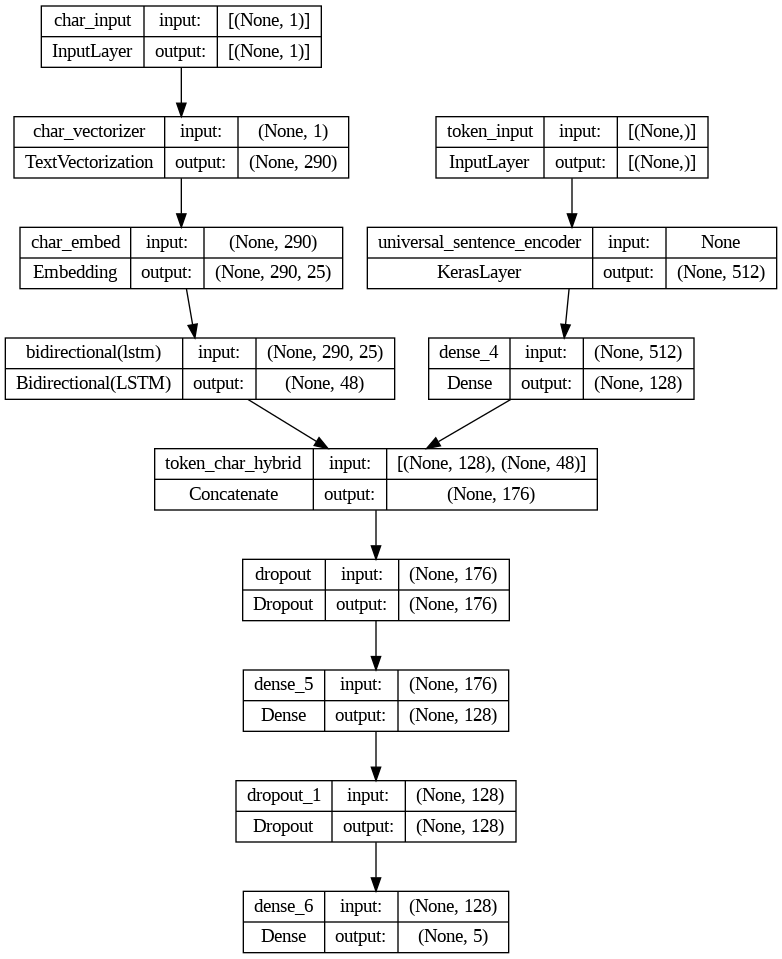

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_4, show_shapes=True)

In [ ]:
model_4.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

###Build dataset

In [ ]:
train_token_char_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars))
train_token_char_labels = tf.data.Dataset.from_tensor_slices(train_labels_ohe)
train_token_char_dataset = tf.data.Dataset.zip((train_token_char_data, train_token_char_labels))
train_token_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

val_token_char_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_token_char_labels = tf.data.Dataset.from_tensor_slices(val_labels_ohe)
val_token_char_dataset = tf.data.Dataset.zip((val_token_char_data, val_token_char_labels))
val_token_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
train_token_char_dataset, val_token_char_dataset

(<_ZipDataset element_spec=((TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None)), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>,
 <_ZipDataset element_spec=((TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None)), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>)

In [ ]:
train_combined_dataset = tf.data.Dataset.from_tensor_slices(((train_sentences, train_chars), train_labels_ohe)).batch(32).prefetch(tf.data.AUTOTUNE)
val_combined_dataset = tf.data.Dataset.from_tensor_slices(((val_sentences, val_chars), val_labels_ohe)).batch(32).prefetch(tf.data.AUTOTUNE)
test_combined_dataset = tf.data.Dataset.from_tensor_slices(((test_sentences, test_chars), test_labels_ohe)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_combined_dataset, val_combined_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [ ]:
for data in train_combined_dataset.take(1):
  print(data[0][0][0])
  print(data[0][1][0])
  print(data[1][0][0])

tf.Tensor(b'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .', shape=(), dtype=string)
tf.Tensor(b't o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .', shape=(), dtype=string)
tf.Tensor(0.0, shape=(), dtype=float64)


### Model fitting and evaluation

In [ ]:
history_4_hybrid = model_4.fit(train_combined_dataset,
                               steps_per_epoch=int(0.1 * len(train_combined_dataset)),
                               epochs=3,
                               validation_data=val_combined_dataset,
                               validation_steps=int(0.1 * len(val_combined_dataset)))

Epoch 1/3
562/562 [==============================] - 209s 352ms/step - loss: 0.9802 - accuracy: 0.6107 - val_loss: 0.7824 - val_accuracy: 0.6995
Epoch 2/3
562/562 [==============================] - 199s 354ms/step - loss: 0.7992 - accuracy: 0.6917 - val_loss: 0.7163 - val_accuracy: 0.7344
Epoch 3/3
562/562 [==============================] - 204s 363ms/step - loss: 0.7713 - accuracy: 0.7023 - val_loss: 0.6842 - val_accuracy: 0.7417


In [ ]:
model_4.evaluate(val_combined_dataset)

945/945 [==============================] - 70s 75ms/step - loss: 0.6908 - accuracy: 0.7385


[0.6908315420150757, 0.7385476231575012]

In [ ]:
model_4_preds_probs = model_4.predict(val_combined_dataset)
model_4_preds = tf.argmax(model_4_preds_probs, axis=1)
model_4_preds

945/945 [==============================] - 73s 73ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 1])>

In [ ]:
model_4_results = calculate_results(val_labels_encoded, model_4_preds)
model_4_results

{'accuracy': 73.8547596981332,
 'precision': 0.7388585659421967,
 'recall': 0.7385475969813319,
 'f1': 0.7356280595234861}

What if we ignore Dense layer in token embeddings, directly use the token embeddings, will our model perform better

In [ ]:
# Set up token model
token_inputs = tf.keras.layers.Input(shape=[], dtype=tf.string, name='token_input')
token_embeddings = tf_hub_embeddinglayer(token_inputs)
#token_outputs = tf.keras.layers.Dense(128, activation='relu')(token_embeddings) #ignore the dense layer
token_model = tf.keras.Model(token_inputs, token_embeddings)

# Set up char_level model
char_inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string, name='char_input')
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(char_inputs, char_bi_lstm)

# Concatenate token model output and char model output
token_char_concat = tf.keras.layers.Concatenate(name='token_char_hybrid')([token_model.output, char_model.output])

# Create output layers and add dropouts
combined_drop_out = tf.keras.layers.Dropout(0.5)(token_char_concat)
combined_dense = tf.keras.layers.Dense(128, activation='relu')(combined_drop_out)
final_dropout = tf.keras.layers.Dropout(0.5)(combined_dense)
output_layer = tf.keras.layers.Dense(5, activation='softmax')(final_dropout)

# model-4
model_4b = tf.keras.Model(inputs=[token_model.inputs, char_model.inputs], outputs=output_layer)

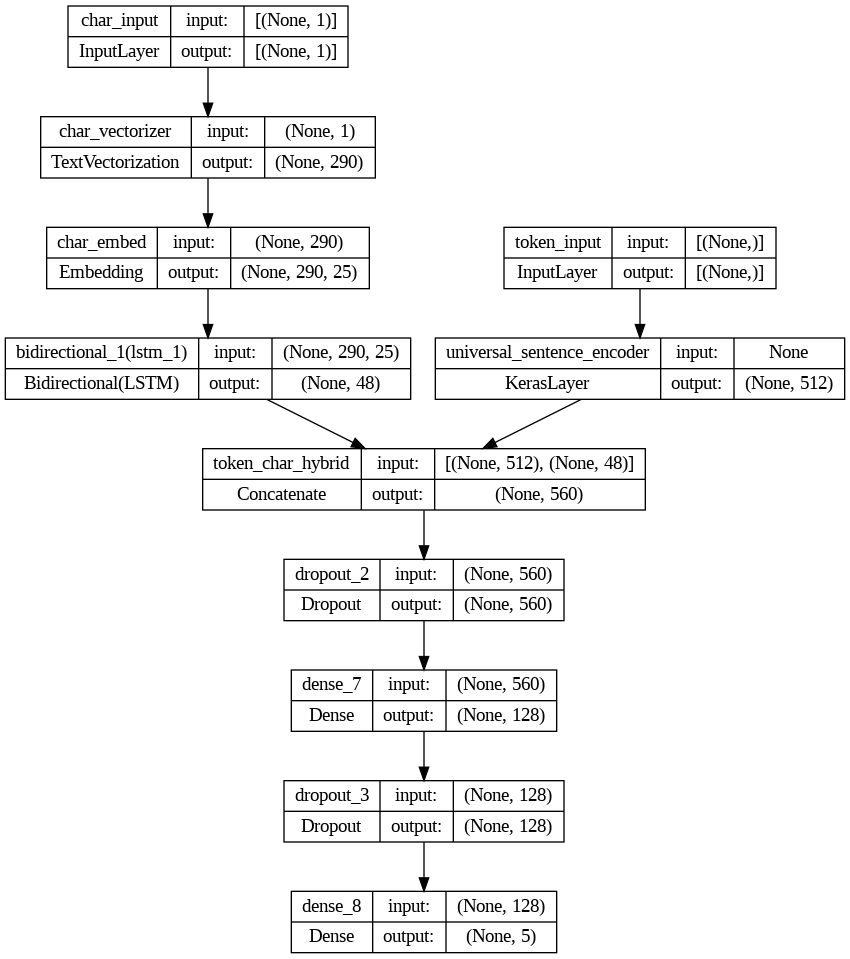

In [ ]:
plot_model(model_4b, show_shapes=True)

In [ ]:
model_4b.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 290)         0           ['char_input[0][0]']             
 tion)                                                                                            
                                                                                                  
 token_input (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 char_embed (Embedding)         (None, 290, 25)      700         ['char_vectorizer[2][0]']  

In [ ]:
model_4b.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

In [ ]:
history_model_4b = model_4b.fit(train_combined_dataset,
                               steps_per_epoch=int(0.1 * len(train_combined_dataset)),
                               epochs=3,
                               validation_data=val_combined_dataset,
                               validation_steps=int(0.1 * len(val_combined_dataset)))

Epoch 1/3
562/562 [==============================] - 215s 363ms/step - loss: 1.0336 - accuracy: 0.5931 - val_loss: 0.7990 - val_accuracy: 0.6908
Epoch 2/3
562/562 [==============================] - 198s 352ms/step - loss: 0.8564 - accuracy: 0.6641 - val_loss: 0.7519 - val_accuracy: 0.7148
Epoch 3/3
562/562 [==============================] - 202s 359ms/step - loss: 0.8476 - accuracy: 0.6771 - val_loss: 0.7321 - val_accuracy: 0.7237


In [ ]:
model_4b.evaluate(val_combined_dataset)

945/945 [==============================] - 71s 76ms/step - loss: 0.7332 - accuracy: 0.7226


[0.733224093914032, 0.7225936651229858]

In [ ]:
model_4b_preds_probs = model_4b.predict(val_combined_dataset)
model_4b_preds = tf.argmax(model_4b_preds_probs, axis=1)
model_4b_preds[:5]

945/945 [==============================] - 75s 75ms/step


<tf.Tensor: shape=(5,), dtype=int64, numpy=array([0, 1, 3, 2, 2])>

In [ ]:
model_4b_results = calculate_results(val_labels_encoded, model_4b_preds)

In [ ]:
model_4b_results

{'accuracy': 72.25936713888521,
 'precision': 0.7186678039329679,
 'recall': 0.7225936713888521,
 'f1': 0.7177379061157426}

In [ ]:
model_4_results

{'accuracy': 73.8547596981332,
 'precision': 0.7388585659421967,
 'recall': 0.7385475969813319,
 'f1': 0.7356280595234861}

model_4 performed better than 4b

## Model-5: Adding Positional Embeddings. Building Tribrid Embedding Model

### Feature Engineering

**Note any feature engineered should be available at test time**

In [ ]:
train_df.head()

,line_no,target,text,total_lines
0,0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,12
1,1,METHODS,a total of @ patients with primary knee oa wer...,12
2,2,METHODS,outcome measures included pain reduction and i...,12
3,3,METHODS,pain was assessed using the visual analog pain...,12
4,4,METHODS,secondary outcome measures included the wester...,12


In [ ]:
train_df.line_no.value_counts()

0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_no, dtype: int64

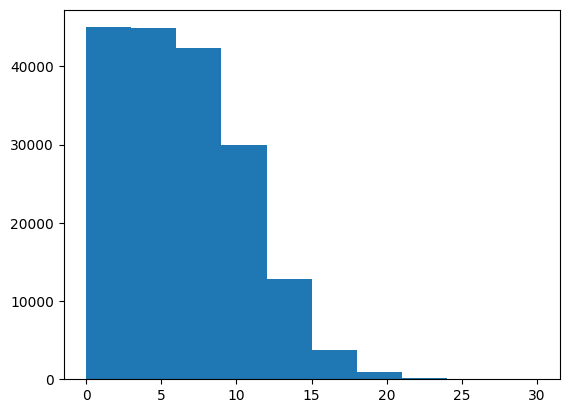

In [ ]:
# check the distribution
plt.hist(train_df.line_no)
plt.show()

In [ ]:

# Use TensorFlow to create one-hot-encoded tensors of our "line_number" column
train_line_numbers_one_hot = tf.one_hot(train_df["line_no"].to_numpy(), depth=15)
val_line_numbers_one_hot = tf.one_hot(val_df["line_no"].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df["line_no"].to_numpy(), depth=15)

train_line_numbers_one_hot[:10], train_line_numbers_one_hot.shape

(<tf.Tensor: shape=(10, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]],
       dtype=float32)>,
 TensorShape([180040, 15]))

Feature engineer total_lines feature

In [ ]:
train_df.total_lines.value_counts()

12    24468
11    23639
13    22113
10    19400
14    18438
15    14610
9     12285
16    10768
8      7464
17     7429
18     5202
7      3353
19     3344
20     2480
21     1281
6      1146
22      770
23      759
24      264
5       215
25      200
26      182
27       81
29       58
4        32
31       31
28       28
Name: total_lines, dtype: int64

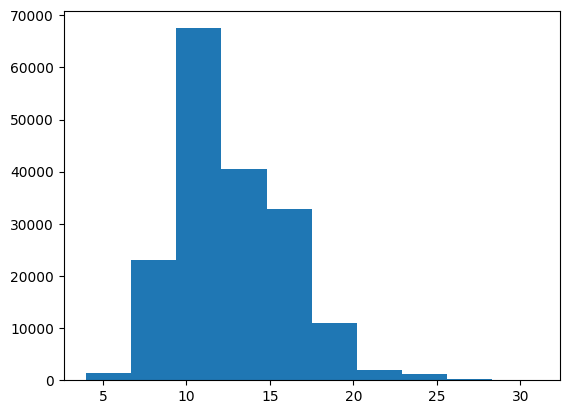

In [ ]:
plt.hist(train_df.total_lines)
plt.show()

In [ ]:
# Check the 95 percentile
np.percentile(train_df.total_lines, 98)

21.0

In [ ]:
# Use TensorFlow to create one-hot-encoded tensors of our "total_lines" column
train_total_lines_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_df["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df["total_lines"].to_numpy(), depth=20)


train_total_lines_one_hot[:5], train_total_lines_one_hot.shape

(<tf.Tensor: shape=(5, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.]], dtype=float32)>,
 TensorShape([180040, 20]))

### Model building and compiling

In [ ]:
from tensorflow.keras import layers


# 1. Token inputs
token_inputs = layers.Input(shape=[], dtype="string", name="token_inputs")
token_embeddings = tf_hub_embeddinglayer(token_inputs)
token_outputs = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_outputs)

# 2. Char inputs
char_inputs = layers.Input(shape=(1,), dtype="string", name="char_inputs")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(32))(char_embeddings)
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# 3. Line numbers inputs
line_number_inputs = layers.Input(shape=(15,), dtype=tf.int32, name="line_number_input")
x = layers.Dense(32, activation="relu")(line_number_inputs)
line_number_model = tf.keras.Model(inputs=line_number_inputs,
                                   outputs=x)

# 4. Total lines inputs
total_lines_inputs = layers.Input(shape=(20,), dtype=tf.int32, name="total_lines_input")
y = layers.Dense(32, activation="relu")(total_lines_inputs)
total_line_model = tf.keras.Model(inputs=total_lines_inputs,
                                  outputs=y)

# 5. Combine token and char embeddings into a hybrid embedding
combined_embeddings = layers.Concatenate(name="token_char_hybrid_embedding")([token_model.output,
                                                                              char_model.output])
z = layers.Dense(256, activation="relu")(combined_embeddings)
z = layers.Dropout(0.5)(z)

# 6. Combine positional embeddings with combined token and char embeddings into a tribrid embedding
z = layers.Concatenate(name="token_char_positional_embedding")([line_number_model.output,
                                                                total_line_model.output,
                                                                z])

# 7. Create output layer
output_layer = layers.Dense(5, activation="softmax", name="output_layer")(z)

# 8. Put together model
model_5 = tf.keras.Model(inputs=[line_number_model.input,
                                 total_line_model.input,
                                 token_model.input,
                                 char_model.input],
                         outputs=output_layer)

In [ ]:
model_5.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_inputs (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 token_inputs (InputLayer)      [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 290)         0           ['char_inputs[0][0]']            
 tion)                                                                                            
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   ['token_inputs[0][0]']    

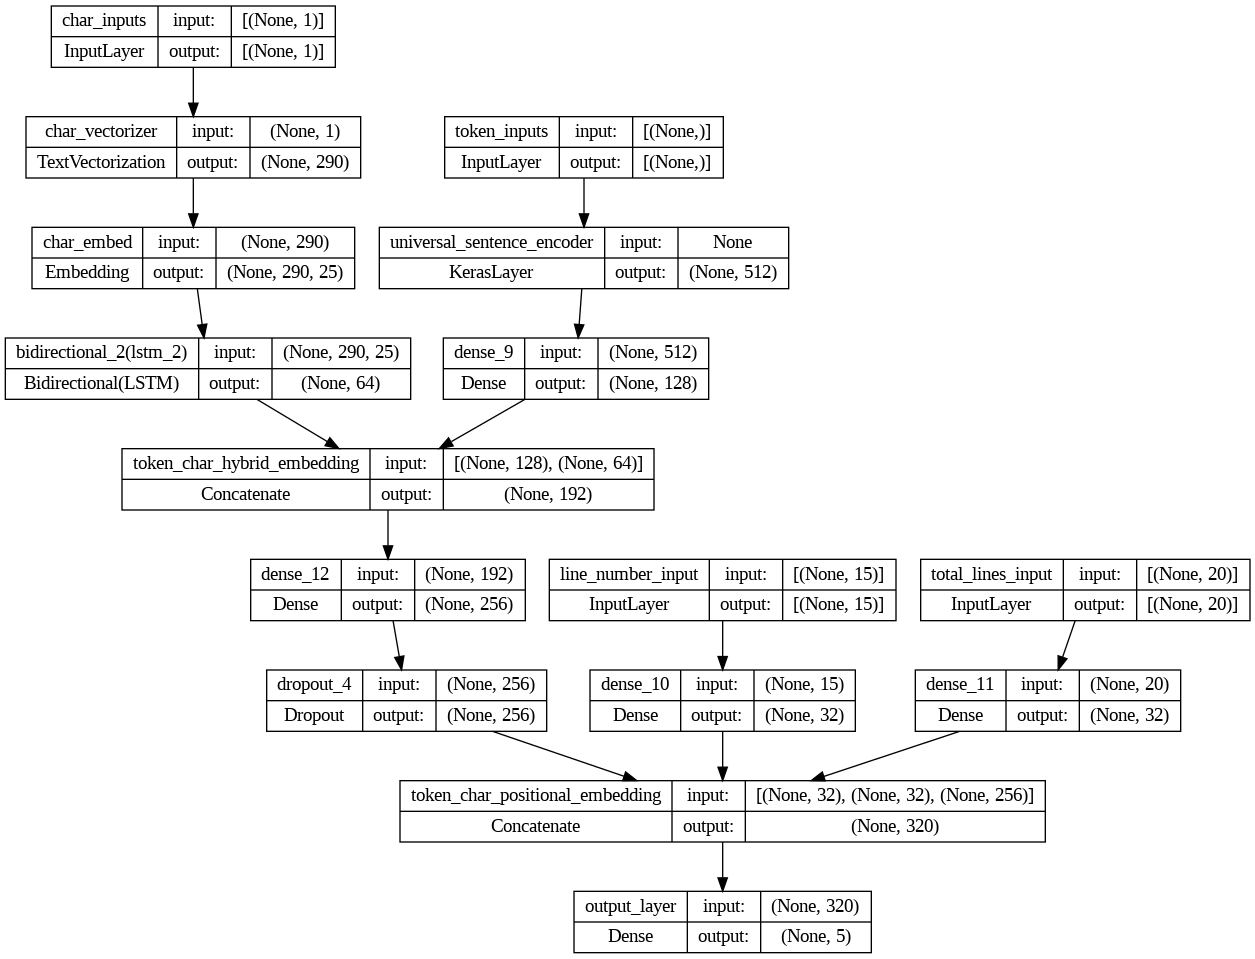

In [ ]:
plot_model(model_5, show_shapes=True)

In [ ]:
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
                optimizer='adam',
                metrics=['accuracy'])

### Build tf datasets

In [ ]:
# Create training and validation datasets (all four kinds of inputs)
train_pos_char_token_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot, # line numbers
                                                                train_total_lines_one_hot, # total lines
                                                                train_sentences, # train tokens
                                                                train_chars)) # train chars
train_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_ohe) # train labels
train_pos_char_token_dataset = tf.data.Dataset.zip((train_pos_char_token_data, train_pos_char_token_labels)) # combine data and labels
train_pos_char_token_dataset = train_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Validation dataset
val_pos_char_token_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sentences,
                                                              val_chars))
val_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_ohe)
val_pos_char_token_dataset = tf.data.Dataset.zip((val_pos_char_token_data, val_pos_char_token_labels))
val_pos_char_token_dataset = val_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Check input shapes
train_pos_char_token_dataset, val_pos_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

### Model fitting and evaluation

In [ ]:
history_tribrid_model = model_5.fit(train_pos_char_token_dataset,
                                    steps_per_epoch=int(0.1 * len(train_pos_char_token_dataset)),
                                    epochs=3,
                                    validation_data=val_pos_char_token_dataset,
                                    validation_steps=int(0.1 * len(val_pos_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 319s 544ms/step - loss: 1.1013 - accuracy: 0.7193 - val_loss: 0.9818 - val_accuracy: 0.8088
Epoch 2/3
562/562 [==============================] - 217s 386ms/step - loss: 0.9677 - accuracy: 0.8135 - val_loss: 0.9493 - val_accuracy: 0.8311
Epoch 3/3
562/562 [==============================] - 218s 387ms/step - loss: 0.9501 - accuracy: 0.8242 - val_loss: 0.9382 - val_accuracy: 0.8341


In [ ]:
model_5.evaluate(val_pos_char_token_dataset)

945/945 [==============================] - 79s 84ms/step - loss: 0.9374 - accuracy: 0.8326


[0.9373759627342224, 0.8326161503791809]

In [ ]:
model_5_preds_probs = model_5.predict(val_pos_char_token_dataset)
model_5_preds = tf.argmax(model_5_preds_probs, axis=1)

945/945 [==============================] - 80s 82ms/step


In [ ]:
model_5_results = calculate_results(val_labels_encoded, model_5_preds)
model_5_results

{'accuracy': 83.26161790017211,
 'precision': 0.8314178787572634,
 'recall': 0.8326161790017211,
 'f1': 0.8316990224224615}

In [ ]:
model_4_results

{'accuracy': 73.8547596981332,
 'precision': 0.7388585659421967,
 'recall': 0.7385475969813319,
 'f1': 0.7356280595234861}

In [ ]:
all_results = pd.DataFrame({'model_0_baseline':baseline_results,
                            'model_1_custom_token_embedding':model_1_results,
                            'model_2_pretrained_token_embedding':model_2_results,
                            'model_3_char_embedding':model_3_results,
                            'model_4_hybrid_char_token':model_4_results,
                            'model_5_pos_char_token':model_5_results})
all_results = all_results.transpose()
all_results

,accuracy,precision,recall,f1
model_0_baseline,72.183238,0.718647,0.721832,0.698925
model_1_custom_token_embedding,79.852377,0.797427,0.798524,0.796659
model_2_pretrained_token_embedding,71.372302,0.714315,0.713723,0.710828
model_3_char_embedding,66.407388,0.658241,0.664074,0.654090
model_4_hybrid_char_token,73.854760,0.738859,0.738548,0.735628
model_5_pos_char_token,83.261618,0.831418,0.832616,0.831699


In [ ]:
all_results['accuracy'] = all_results['accuracy'] / 100
all_results

,accuracy,precision,recall,f1
model_0_baseline,0.721832,0.718647,0.721832,0.698925
model_1_custom_token_embedding,0.798524,0.797427,0.798524,0.796659
model_2_pretrained_token_embedding,0.713723,0.714315,0.713723,0.710828
model_3_char_embedding,0.664074,0.658241,0.664074,0.654090
model_4_hybrid_char_token,0.738548,0.738859,0.738548,0.735628
model_5_pos_char_token,0.832616,0.831418,0.832616,0.831699


For model_5 try custom Embedding instead of pretrained

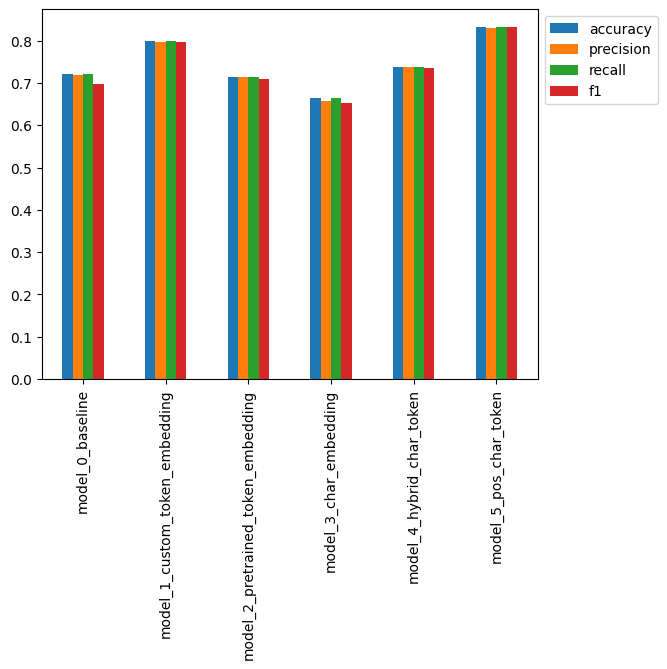

In [ ]:
all_results.plot(kind='bar').legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

<Axes: >

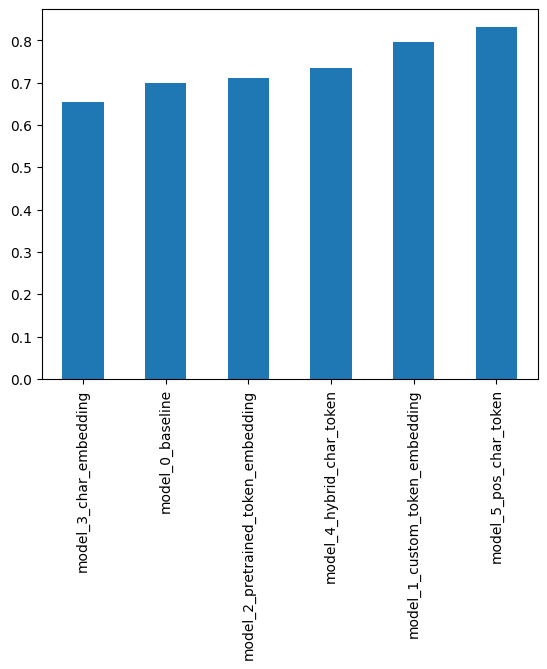

In [ ]:
# Sort models by f1 score
all_results.sort_values('f1', ascending=True)['f1'].plot(kind='bar')

In [ ]:
## Save and load model
model_5.save('skimlit_tribrid_model')

In [ ]:
# Load the saved model
loaded_model = tf.keras.models.load_model('skimlit_tribrid_model')

In [ ]:
loaded_model_preds_probs = loaded_model.predict(val_pos_char_token_dataset)
loaded_model_preds = tf.argmax(loaded_model_preds_probs, axis=1)

945/945 [==============================] - 97s 102ms/step


In [ ]:
# lets get the model_5 results for comparison sake
model_5_results

{'accuracy': 83.26161790017211,
 'precision': 0.8314178787572634,
 'recall': 0.8326161790017211,
 'f1': 0.8316990224224615}

In [ ]:
# calculate all metrics
loaded_model_results = calculate_results(val_labels_encoded, loaded_model_preds)
loaded_model_results

{'accuracy': 83.19541903879252,
 'precision': 0.8312149222084607,
 'recall': 0.8319541903879253,
 'f1': 0.8313516456165562}

In [ ]:
# assert if the result matches the model_5 results
assert model_5_results == loaded_model_results

AssertionError: ignored

In [ ]:
# lets use np.isclose method if the results are close
np.isclose(list(model_5_results.values()), list(loaded_model_results.values()), rtol=1e-02)

array([ True,  True,  True,  True])

In [ ]:
# Check summary
loaded_model.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_inputs (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 token_inputs (InputLayer)      [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 290)         0           ['char_inputs[0][0]']            
 tion)                                                                                            
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   ['token_inputs[0][0]']    

In [ ]:
# save the model to your drive
!cp -r /content/skimlit_tribrid_model /content/drive/MyDrive/ColabNotebooks/udemy_tf

## Challenge:
Download the model from here: https://storage.googleapis.com/ztm_tf_course/skimlit/skimlit_tribrid_model.zip
- Evaluate model on test dataset - you need to create test dataset using tf.data api
- Find most wrong prediction - as we did in previous assignments
- Make real abstract example predictions (use only rct(randomized clinical trials) papers)

In [ ]:
import tensorflow as tf